Employee churn refers to the departure of employees from an organization. It's essentially the loss of intellectual assets and workforce, which impacts productivity, morale, and operational continuity.

#### 📉 Causes of Employee Churn:

Research shows that churn is influenced by:


Personal factors: Age, gender, ethnicity, education, marital status

Work-related factors: Tenure, pay, job satisfaction, salary, working conditions, growth opportunities, and perceived fairness

Special skill sets: Employees with niche skills are harder to replace and their loss has a greater impact.

#### 💰 Cost of Churn:


Financial: Hiring and training replacements is expensive

Operational: Loss of expertise and temporary productivity drop

Time: New employees take time to ramp up

#### 🧠 Why Predict Churn?

Machine learning helps organizations predict churn and take proactive actions such as:

Improving retention strategies

Enhancing employee satisfaction

Reducing recruitment costs

#### 🔁 Employee vs. Customer Churn:


Employees are selected by the company, customers are not.

Employees are the face and engine of the organization.

Losing employees, like losing customers, affects business but with different internal implications.

Understanding employee churn helps build better HR policies.




### 🛠️ Machine Learning Approach



#### 🔢 Data Preprocessing:

Encoded categorical features using LabelEncoder and OrdinalEncoder

Handled class imbalance using SMOTE to oversample the minority class (left = 1)

Split data into training and testing sets (e.g., 70/30)

#### 🤖 Model Training:

Used a Random Forest Classifier to model the data.



#### ✅ Conclusion


The model demonstrated excellent performance in predicting employee churn, with high accuracy, precision, recall, and F1 scores — even on an imbalanced dataset.

By leveraging this model, organizations can:

Better understand the factors contributing to churn

Implement targeted retention strategies

Minimize the costs and disruption of employee turnover



In [48]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np


In [49]:
df= pd.read_csv(r"C:\Users\SD\Downloads\Hr dataset\HR_comma_sep.csv")

In [50]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## You can describe the 10 attributes in detail as:

satisfaction_level: It is employee satisfaction point, which ranges from 0-1.

last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.

number_projects: How many numbers of projects assigned to an employee?

average_monthly_hours: How many average numbers of hours worked by an employee in a month?

time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.

work_accident: Whether an employee has had a work accident or not.

promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.

Departments: Employee's working department/division.

Salary: Salary level of the employee such as low, medium and high.

left: Whether the employee has left the company or not.

#### Exploratory Data Analysis

In [52]:
df.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


 Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

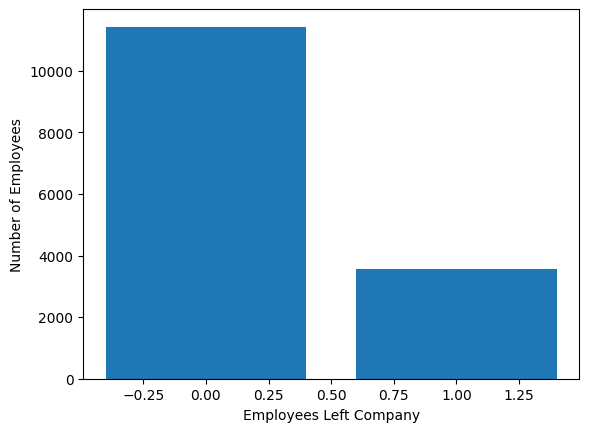

In [53]:
### How many Employees left?

left_count=df.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()


In [54]:
df.left.value_counts()


left
0    11428
1     3571
Name: count, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment. The target looks imbalanced and we will handle this before training the model

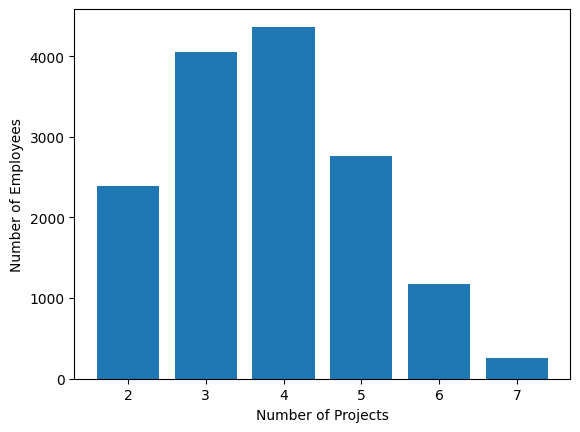

In [55]:
## Number of projects per employee

num_projects=df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


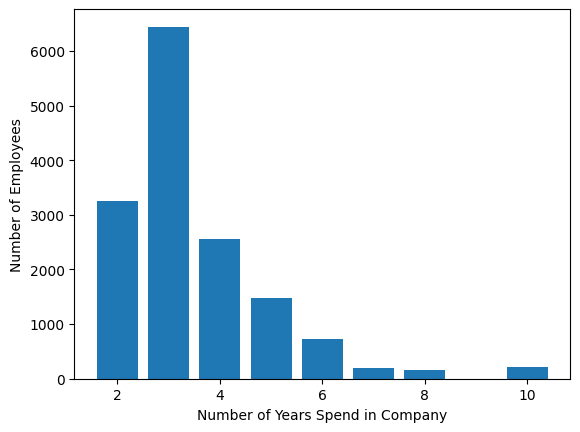

In [56]:
### Time spent in company

time_spent=df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()


Most of the employee spent between 2-4 years.

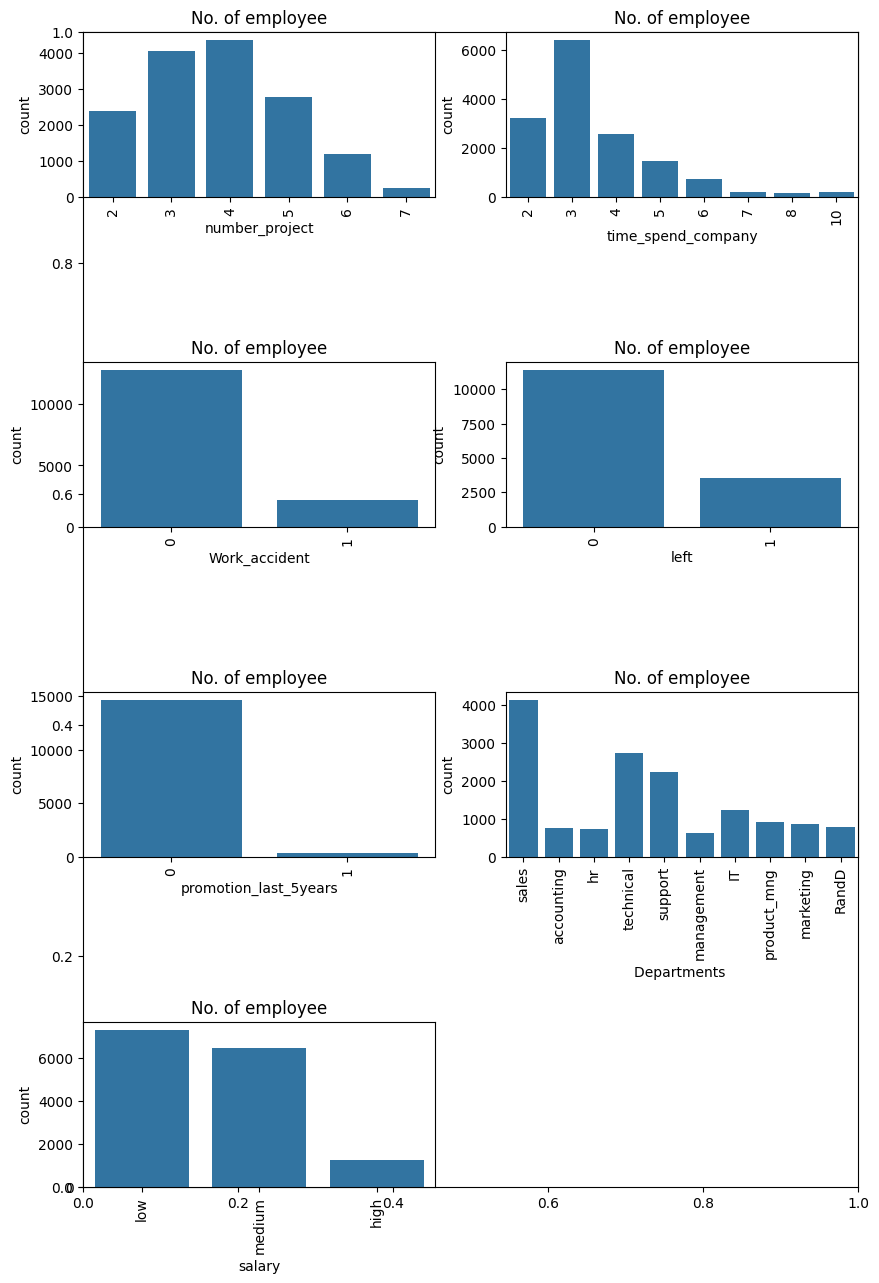

In [57]:
## Distribution of features

features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


Most of the employee is doing the project from 3-5.

There is a huge drop between 3 years and 4 years experienced employee.

The no of employee left is 23 % of the total employment.

A decidedly less number of employee get the promotion in the last 5 year.

The sales department is having maximum no.of employee followed by technical and support

Most of the employees are getting salary either medium or low.

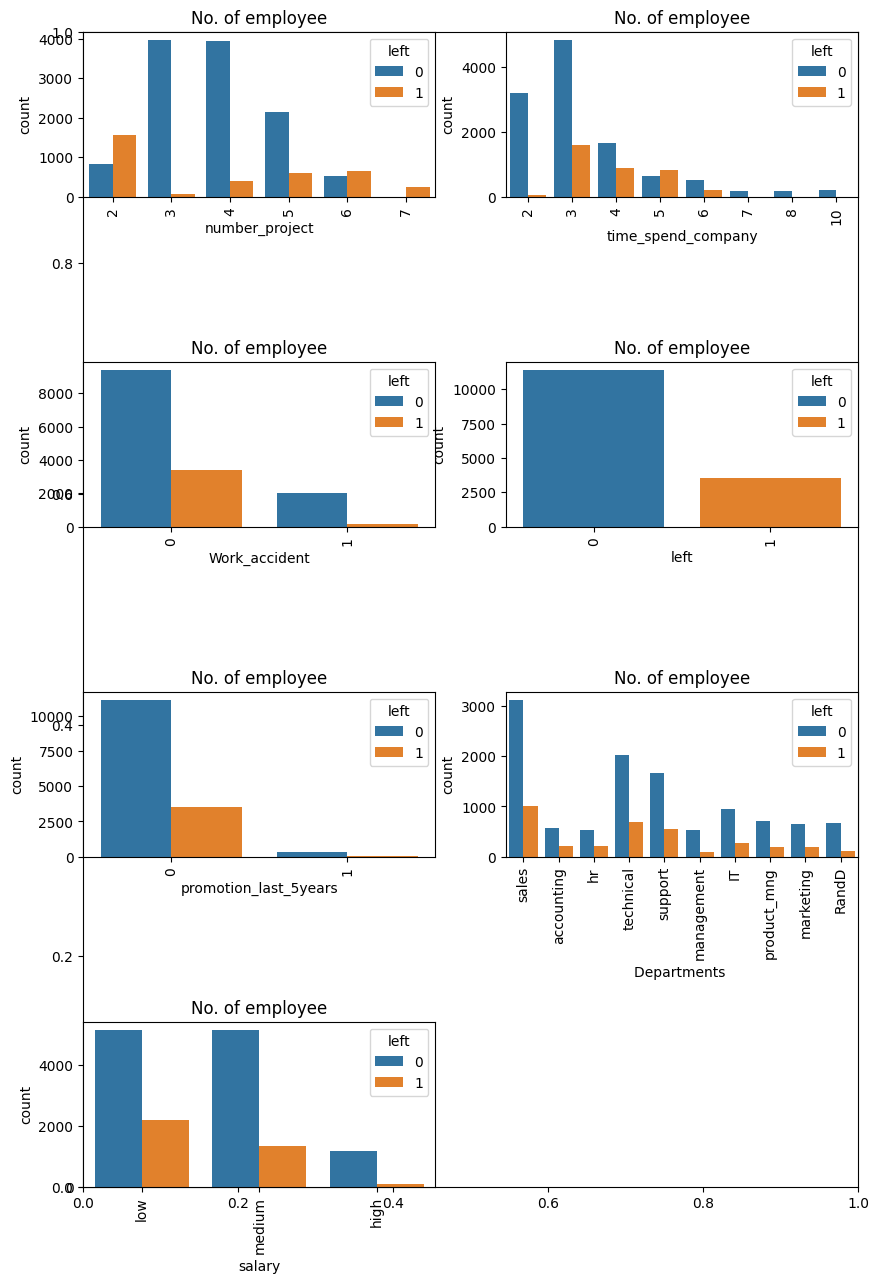

In [58]:


fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


Those employees who have the number of projects more than 5 were left the company.

The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.

The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving 
because of affection with the company.

Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

### Data Analysis and Visualization Summary:

Following features are most influencing a person to leave the company:

Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.

Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.

Salary: Most of the employees that quit among the mid or low salary groups.

#### Cluster Analysis:

We will try to find out the group of employees that left using Kmeans clustering

In [59]:
#import module
from sklearn.cluster import KMeans
# Filter data

left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)


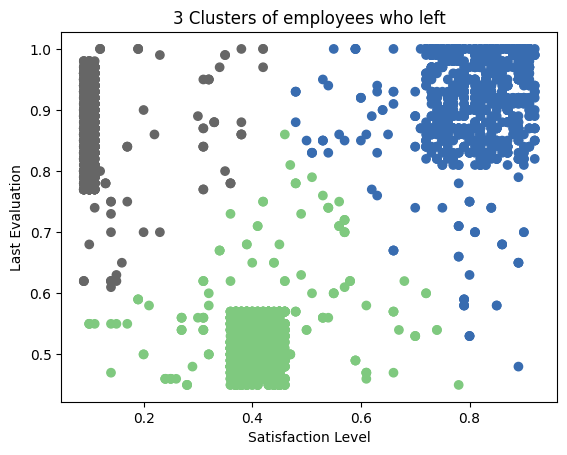

In [60]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


Here, Employee who left the company can be grouped into 3 type of employees:

High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.

Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

#### Building The Prediction Model

In [61]:
# Import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Creating ordinal encoder
ord_enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df['salary'] = ord_enc.fit_transform(df[['salary']]).astype(int)



df['Departments ']=le.fit_transform(df['Departments ']).astype(int)


In [62]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1


In [63]:
#Spliting data into Feature and Target

X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=df['left']


In [64]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test


In [66]:
## Apply SMOTE on training data only
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: left
0    8000
1    2499
Name: count, dtype: int64
After SMOTE: left
1    8000
0    8000
Name: count, dtype: int64


In [68]:
#  Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [69]:
 ##Predict and evaluate
y_pred = model.predict(X_test)

In [71]:
# Evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred))

[[3407   21]
 [  44 1028]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

